In [57]:
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
import numpy as np
import json
import random
%matplotlib inline

In [58]:
def time(time):
    try:
        return datetime.strptime(time[:19], '%Y-%m-%dT%H:%M:%S')
    except ValueError:
        pass

In [59]:
logs_count = 400
logs = open('').read()
logs = logs.split('\n')
logs_new = []

In [60]:
logs = random.sample(logs, 30000)

In [61]:
logs = list(map(lambda a: a.split('\t'), logs))

In [62]:
a = 0
for log in logs:
    if time(log[0]):
        log[0] = time(log[0])
    logs[logs.index(log)] = log
    if a % 100 == 0: 
        print a
    a+=1

0


In [63]:
logs[:10]

[[datetime.datetime(2016, 5, 13, 23, 49, 2),


In [64]:
first_time = {}
for log in logs:
    new= log[0].hour + log[0].day*24 + log[0].month*24*7
    try:
        if first_time[log[1]] > new:
            first_time[log[1]] = new
    except:
        first_time[log[1]] = new

In [65]:
import pandas as pd
data = {}
for a in range(0,101):
    data[a] = [0]*len(Counter(list(map(lambda a: a[1], logs))))

In [66]:
data = pd.DataFrame.from_dict(data)

In [67]:
data.index = Counter(list(map(lambda a: a[1], logs))).keys()

In [68]:
for log in logs:
    old = log[0].hour + log[0].day*24 + log[0].month*24*7
    new = first_time[log[1]]
    if not old-new > 99:
        data[old-new][log[1]]+= 1

In [89]:
k = 100

In [90]:
y = []
for i in range(0,k):
    y.append(np.mean(data[i].values))

In [91]:
x = range(0,k)

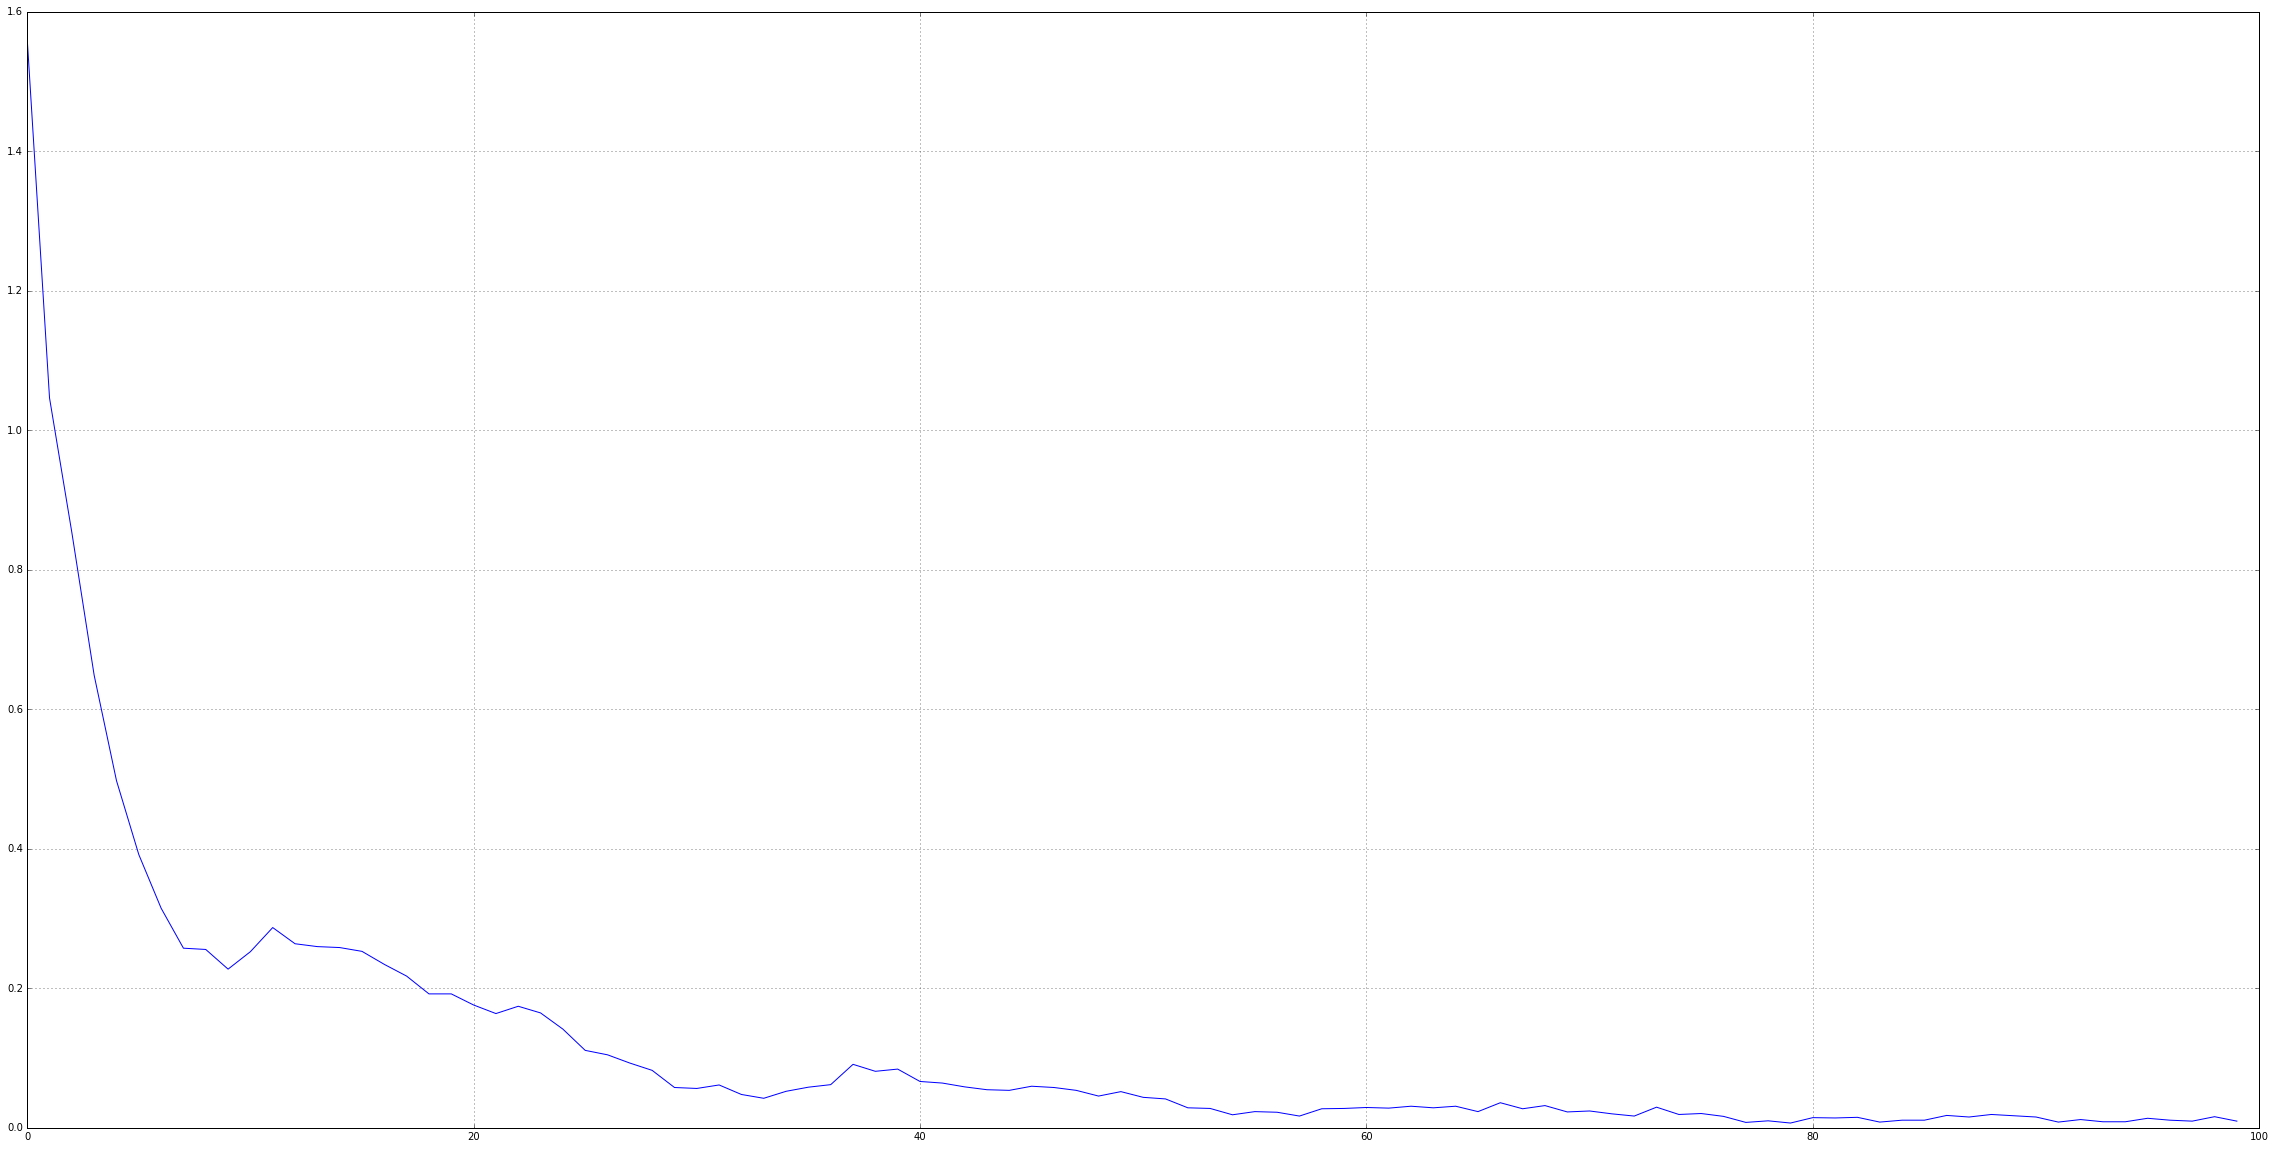

In [92]:
plt.figure(figsize=(40,20))
plt.grid(True)
plt.plot(x,y)